## 유통업이란?
- 생상된 상품을 소비자에게 전달하기 위한 모든 활동
- 제조업체(Manufacturer), 도매업자(Wholesacler), 소매업자(Retailer), 유통 채널(Distribution channel), 마케팅 및 판매(Sacle and Marketing), 전자상거래(E-commerce), 로지스틱스(Logistics)

## 유통업계 현황
- 이마롯쿠: 국내 유통 3강인 이마트, 롯데마트, 쿠팡을 의미
- 쿠팡, 이커머스서 '리테일' 기업으로 변신 중
- 쿠팡 3분기 사상 최대 매출. 연간 흑자 달성 유력
- '엔데믹'에도 고객 늘어... 취급 상품 수 증가한 덕분
- 오프라인서도 소비자 만나는 쿠팡 "접점 늘린다"
- '이커머스' 아닌 '전체 유통 시장'에서 점유율 평가  
=> 이커머스와 리테일 경계 모호해지는 중
- 알리익스프레스, 태무 등 중국 업체 많이 들어오는 중  
=> 업체들 간 경쟁 심해지고 분석가, 사이언스로 경쟁력 강화 중

# 1차 프로젝트: Adidas 미국 판매데이터 분석 - 파트1

### 데이터 출처: Kaggle (https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# (1) 데이터 로드 및 확인

In [29]:
import pandas as pd
import numpy as np

adidas= pd.read_excel('/content/drive/MyDrive/Adidas US Sales Datasets.xlsx')

In [30]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [31]:
adidas['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

Retailer: adidas 브랜드를 판매하는 유통처 - 백화점, 마트   
Retailer ID: 판매점 ID  - 대리점 ID  
Price per Unit: 상품 1개당 가격  
Units Sold: 판매수량  
Invocie Date: 판매 날짜  
Region, State, City: 매장 위치  
Product: 제품 카테고리  
Total Sales: Price per Unit * units Sold  
Operating Profit: 영업이익(매출액-원가)  
Operating Margin: 영업마진(영업이익율) = Total Sales / Operating Profit  
Sales Method: In-store, Outlet, Online - 판매채널, 판매방법  

In [33]:
# 데이터타입 조회
adidas.info()
# object = str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


# (2) 데이터 전처리

## 데이터타입 변환

Retailer Object  
Retailer ID int64 -> 문자  (이유: 숫자의 차이가 의미가 있지 않다.)
Invoice Date object -> 날짜  
Region object  
State object  
City object  
Produc object  
Price per Unit object -> 숫자(실수, float)  
Units sold object -> 숫자(실수, float)  
Total Sales object -> 숫자(실수, float)

# 1) 숫자가 문자로 나타난 경우 문자를 숫자로 변환

In [ ]:
adidas['Price per Unit'].astype('float')

# Error 발생: 문자형태인 object는 int 변환 불가능

# Pandas 데이터프레임 내 문자 변환
- DataFrame['컬럼명'].str.메소드 형태로 문자열 함수 사용
- 현재 가격, 매출액 등의 컬럼에는 모두 특수문자 '%', '$;, ','가 포함되어 있음

## 정규표현식을 사용하여 특수문자 전ㅊ체를 제거하는 법
- adidas['Price per Unit'].str.replace('[\W]', ", regex=True)
- [\W]: 숫자, 문자를 제외한 나머지(특수문자)를 의미

## 하지만, 이 경우 소수점이 있기 때문에 특수문자 전체를 제거하면 안됨
- adidas['Price per Unit'].str.replace(['%$,'],")
- 대괄호 [] 안에 있는 문자들을 공백으로 대체

In [34]:
# float 타입으로 변환
adidas['Price per Unit'] = adidas['Price per Unit'].str.replace('[%$,]','').astype('float')
adidas['Units sold'] = adidas['Units sold'].str.replace('[%$,]','').astype('float')
adidas['Total Sales'] = adidas['Total Sales'].str.replace('[%$,]','').astype('float')
adidas['Operating Profit'] = adidas['Operating Profit'].str.replace('[%$,]','').astype('float')
adidas['Operating Margin'] = adidas['Operating Margin'].str.replace('[%$,]','').astype('float')

AttributeError: Can only use .str accessor with string values!

In [35]:
adidas.head()
# 선생님꺼 보면 Operating Margin이 50.0 으로 되어 있어서 0.50으로 바꾸는 듯

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


## Operating Margin은 백분율이기 때문에 0.01을 곱하여 계산에 사용할 수 있도록 새로운 변수 생성

In [37]:
# adidas['Operating_Marging_rate'] = adidas['Operating Margin']*0.01
# adidas.head()

# 2) Pandas 시간데이터 다루기

YYYY-mm-dd 형태의 문자 데이터를 pandas의 datetime으로 변환  
'%Y-%m-%d'  
만약 19990101와 같은 형태라면  
'%Y%m%d'

In [38]:
adidas.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store


In [39]:
# adidas['Invoice Date'] = pd.to_datetime(adidas['Invoice Date'], format='%Y-%m-%d')

In [40]:
# 년, 월만 뺀 열 만들기
adidas['year']=adidas['Invoice Date'].dt.year
adidas['month']=adidas['Invoice Date'].dt.month

In [41]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020,1


# 3) 숫자데이터를 문자데이터로 변환

In [42]:
adidas['Retailer ID'] = adidas['Retailer ID'].astype('string')

In [43]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   string        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  year              9648 non-null   int32         
 14  month             9648 n

# 4) 결측치 처리

In [44]:
adidas.isnull().sum()
# 결측치 없음

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
year                0
month               0
dtype: int64

In [45]:
# 최종 확인
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   string        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  year              9648 non-null   int32         
 14  month             9648 n

# (3) 데이터분석-1

## 월별 판매량 분석

In [46]:
adidas.describe()
# Price per Unit을 보면 평균이랑 50% 수치가 별차이 없으니 데이터가 쏠리지 않음 확인
# Operating Margin 최소 10% (할인을 많이한 상품), 맥스 80%(할인을 적게한 상품: 인기, 최신출시 등)

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,year,month
count,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991,2020.865050,6.458126
min,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000,2020.000000,1.000000
25%,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000,2021.000000,3.000000
50%,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000,2021.000000,6.000000
75%,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000,2021.000000,9.000000
max,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000,2021.000000,12.000000
std,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197,0.341688,3.454799


## 월별 판매량 그래프

<Axes: xlabel='year,month'>

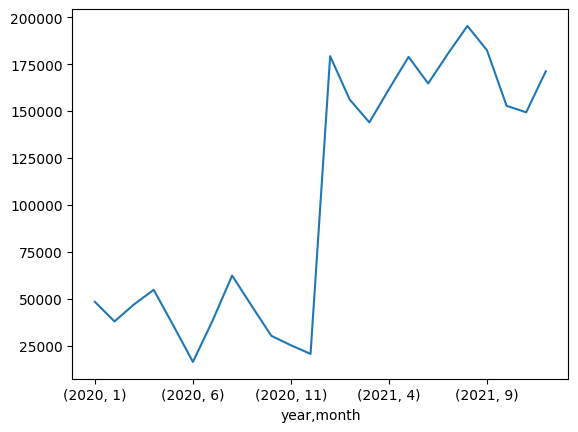

In [47]:
adidas.groupby(['year', 'month'])['Units Sold'].sum().plot.line()
# 달별 판매개수합
# 2020.11 과 21.4 사이 갑자기 뜀 - 일반적이지 않음 - 왜 그럴까 분석해보자

## 2021년 1월부터 판매량이 급등

In [48]:
adidas.groupby(['year', 'month'])['Units Sold'].sum()
# 20년 21년 기점으로 판매량 급등

year  month
2020  1         48333
      2         37846
      3         46972
      4         54709
      5         35705
      6         16269
      7         38219
      8         62307
      9         46125
      10        30167
      11        25152
      12        20545
2021  1        179299
      2        156113
      3        143988
      4        161717
      5        178900
      6        164745
      7        180481
      8        195414
      9        182425
      10       152834
      11       149350
      12       171246
Name: Units Sold, dtype: int64

In [49]:
# 월별 비교
adidas.pivot_table(index='year', columns='month', values='Units Sold', aggfunc='sum')
# 이유가 뭘까? 유통업체는 소매업체가 많은데 유통업체마다 특정 업체가 확 증가했나?

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,48333,37846,46972,54709,35705,16269,38219,62307,46125,30167,25152,20545
2021,179299,156113,143988,161717,178900,164745,180481,195414,182425,152834,149350,171246


## 소매업체별 분석

In [50]:
# 년, 월기준 소매업체별 판매수 비교
adidas.pivot_table(index=['year', 'month'], columns='Retailer', values='Units Sold', aggfunc='sum')
# Amazon 업체 21년도부터 시작, Foot Locker도 21년부터 확 증가, Kohl's 도 20.12부터 시작, West Gear 도 21년부터 확 증가

Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
year month                                                                  
2020 1          NaN      30275.0      NaN            NaN      NaN    18058.0
     2          NaN      14712.0      NaN            NaN      NaN    23134.0
     3          NaN      27650.0      NaN            NaN      NaN    19322.0
     4          NaN       2216.0      NaN            NaN  22146.0    30347.0
     5          NaN       2071.0      NaN         4584.0  10950.0    18100.0
     6          NaN          NaN      NaN            NaN      NaN    16269.0
     7          NaN          NaN      NaN        15198.0   1630.0    21391.0
     8          NaN      17796.0      NaN        10337.0  29676.0     4498.0
     9          NaN       5625.0      NaN         6203.0  19619.0    14678.0
     10         NaN       4446.0      NaN         9944.0  15777.0        NaN
     11         NaN       8193.0      NaN            NaN      NaN    16959.0
     12         NaN       7320.0   2214.0            NaN      NaN    11011.0
2021 1      13006.0      40384.0  29841.0        28070.0      NaN    67998.0
     2      14609.0      36526.0  32766.0        25159.0   1617.0    45436.0
     3      13204.0      31078.0  31904.0        38838.0   3409.0    25555.0
     4      12548.0      26734.0  37976.0        49526.0   6784.0    28149.0
     5      15489.0      35513.0  47726.0        38996.0   8007.0    33169.0
     6      17917.0      56632.0  15116.0        23859.0  10949.0    40272.0
     7      19510.0      59350.0  16403.0        27413.0  16342.0    41463.0
     8      18014.0      41453.0  15675.0        70385.0  17343.0    32544.0
     9      14879.0      24116.0  13671.0        90087.0  15359.0    24313.0
     10     17767.0      28945.0  12409.0        56195.0  13204.0    24314.0
     11     20456.0      43742.0  14765.0        30090.0   9090.0    31207.0
     12     20591.0      59592.0  16909.0        32756.0   4323.0    37075.0

<Axes: xlabel='year,month'>

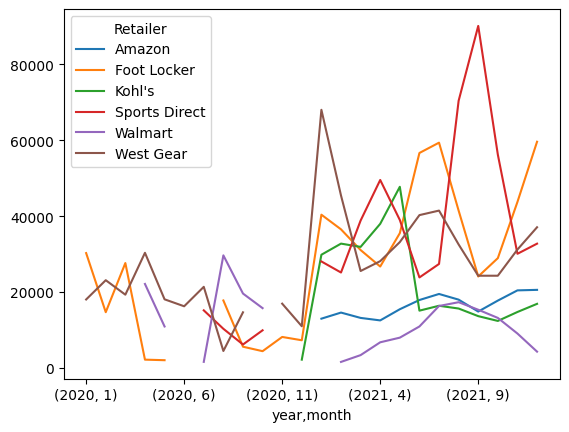

In [51]:
# 위 표 그래프로 보기
adidas.pivot_table(index=['year', 'month'], columns='Retailer', values='Units Sold', aggfunc='sum').plot.line()
# 전체적으로 판매량 증가 및 판매 안하던 곳에서 판매 시작 혹은 판매가 없다가 많아짐
# - 한계: 판매를 시작한건지 판매수가 0이었다가 많아진건지는 알 수 없다. 그러나 아마존이라는 판매처 특성상 0일리가 없으니 판매 시작으로 생각하기
# 왜 갑자기 아마존 판매 시작했고 갑자기 많이 판매하기 시작했을까?
# Foot Locker는 매장이 늘어서 판매량이 증가한건가?

In [52]:
# 소매업점별 지점을 알아보자
#  'adidas' 컬럼에서 중복된 행을 제거하고, 'Retailer'과 'Retailer ID' 열을 선택한 후 'Retailer' 열을 기준으로 정렬하는 작업을 수행
adidas[['Retailer', 'Retailer ID']].drop_duplicates().sort_values('Retailer')
# 소매브랜드 안에도 ID가 여러개 있음(해당 소매점 브랜드의 점포 ID로 보임)

,Retailer,Retailer ID
1148,Amazon,1185732
2007,Foot Locker,1197831
1287,Foot Locker,1128299
0,Foot Locker,1185732
212,Kohl's,1189833
2147,Kohl's,1128299
1499,Kohl's,1185732
2786,Kohl's,1197831
766,Sports Direct,1185732
68,Sports Direct,1197831


## 월별로 상점의 숫자는 어떻게 될까?
## 예) 2020년에는 Foot Locker의 상점 수가 1개였는데 2021년에는 3개로 늘지 않았을까?

In [55]:
df=adidas[['Retailer', 'Retailer ID', 'year', 'month']].drop_duplicates().sort_values(['Retailer', 'Retailer ID', 'year', 'month'])
df
# 행이 211로 많아서 개수로 파악해보자.

,Retailer,Retailer ID,year,month
1224,Amazon,1185732,2021,1
1225,Amazon,1185732,2021,2
1231,Amazon,1185732,2021,3
1237,Amazon,1185732,2021,4
1243,Amazon,1185732,2021,5
...,...,...,...,...
2769,West Gear,1197831,2021,8
2775,West Gear,1197831,2021,9
2714,West Gear,1197831,2021,10
2715,West Gear,1197831,2021,11


In [56]:
# 년별, 월별로 지점ID 개수 파악하기
df.pivot_table(index=['year', 'month'], values = 'Retailer ID', aggfunc='count')
# 21년 기점으로 지점이 늘었다.

Retailer ID
year month             
2020 1                2
     2                2
     3                2
     4                4
     5                4
     6                1
     7                3
     8                5
     9                4
     10               3
     11               2
     12               3
2021 1               14
     2               15
     3               15
     4               15
     5               15
     6               13
     7               15
     8               16
     9               15
     10              16
     11              14
     12              13

<Axes: xlabel='year,month'>

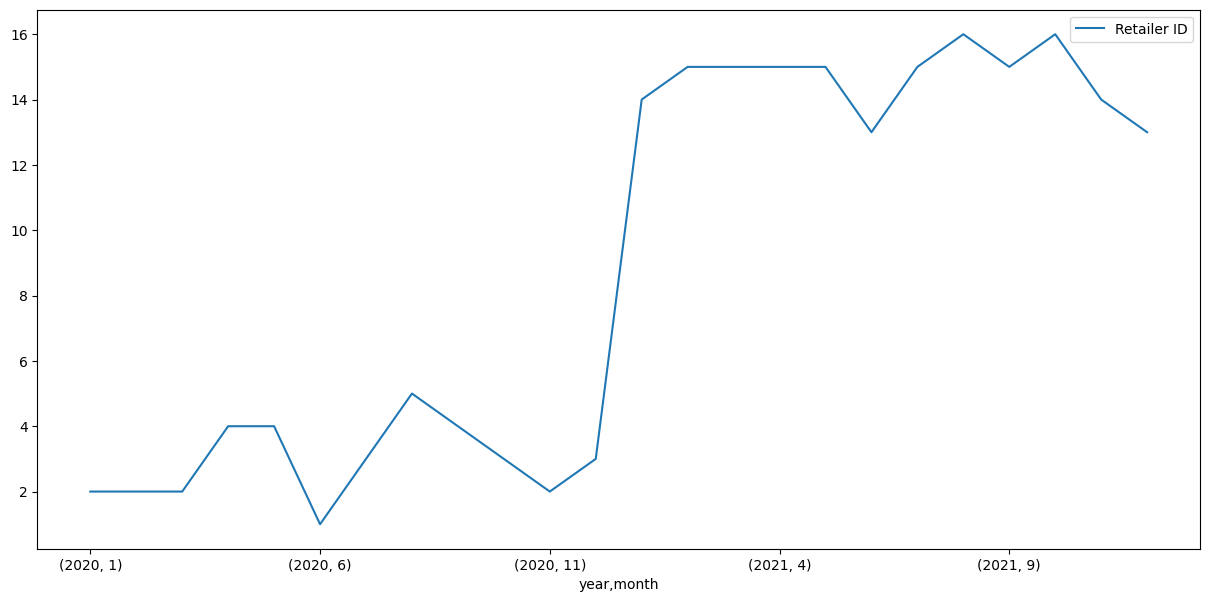

In [61]:
df.pivot_table(index=['year', 'month'], values = 'Retailer ID', aggfunc='count').plot(kind='line', figsize=(15,7))

In [58]:
# 업체별로는 지점이 얼마나 늘었을까
df.pivot_table(index=['year', 'month'], columns= 'Retailer', values = 'Retailer ID', aggfunc='count')
# 전반적으로 지점 수 늘었다.

Retailer    Amazon  Foot Locker  Kohl's  Sports Direct  Walmart  West Gear
year month                                                                
2020 1         NaN          1.0     NaN            NaN      NaN        1.0
     2         NaN          1.0     NaN            NaN      NaN        1.0
     3         NaN          1.0     NaN            NaN      NaN        1.0
     4         NaN          1.0     NaN            NaN      1.0        2.0
     5         NaN          1.0     NaN            1.0      1.0        1.0
     6         NaN          NaN     NaN            NaN      NaN        1.0
     7         NaN          NaN     NaN            1.0      1.0        1.0
     8         NaN          1.0     NaN            1.0      1.0        2.0
     9         NaN          1.0     NaN            1.0      1.0        1.0
     10        NaN          1.0     NaN            1.0      1.0        NaN
     11        NaN          1.0     NaN            NaN      NaN        1.0
     12        NaN          1.0     1.0            NaN      NaN        1.0
2021 1         1.0          3.0     4.0            3.0      NaN        3.0
     2         1.0          3.0     4.0            3.0      1.0        3.0
     3         1.0          3.0     4.0            3.0      1.0        3.0
     4         1.0          2.0     4.0            3.0      2.0        3.0
     5         1.0          2.0     4.0            3.0      2.0        3.0
     6         1.0          2.0     3.0            2.0      2.0        3.0
     7         1.0          3.0     3.0            2.0      3.0        3.0
     8         1.0          3.0     3.0            3.0      3.0        3.0
     9         1.0          2.0     3.0            3.0      3.0        3.0
     10        1.0          3.0     3.0            3.0      3.0        3.0
     11        1.0          3.0     3.0            3.0      1.0        3.0
     12        1.0          3.0     3.0            2.0      1.0        3.0

<Axes: xlabel='year,month'>

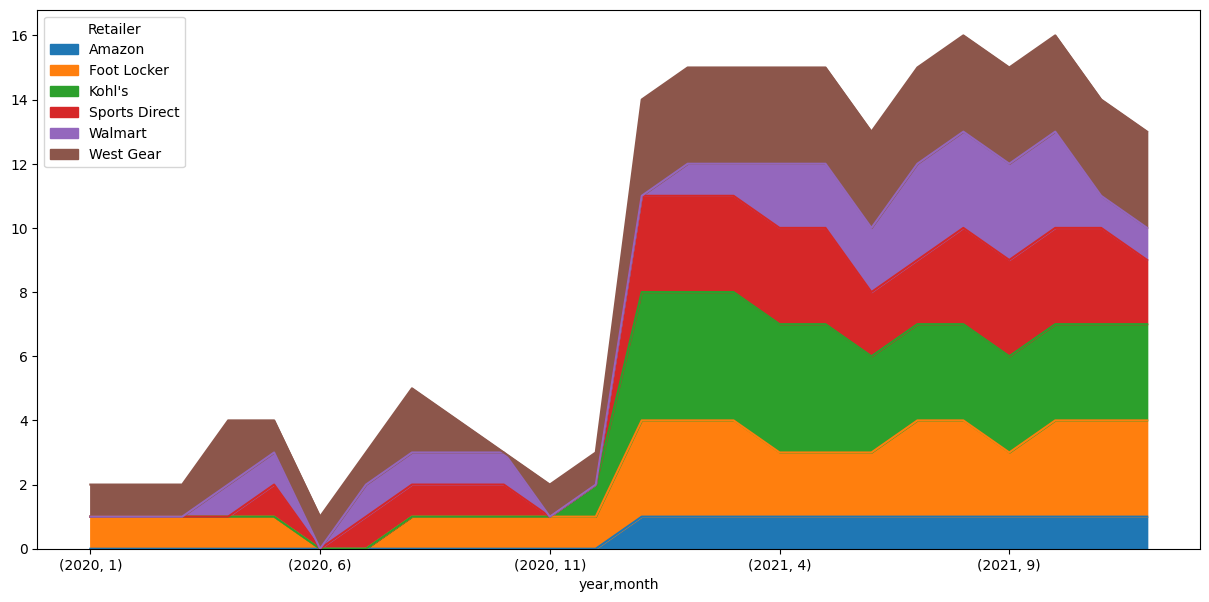

In [62]:
# kind='area'로 봐보자
df.pivot_table(index=['year', 'month'], columns= 'Retailer', values = 'Retailer ID', aggfunc='count').plot(kind='area', figsize=(15,7))
# 유통 업체별로 다르긴 하나 전반적으로 늘었다.
# 왜 늘었을까?
# 20년까지는 소극적이었는데 21년부터 적극적으로 바뀌었다. 왜 그럴까?
# 외부 요인을 살펴보며 원인을 파악할 수 있을 거 같다.

## 아디다스는 2020년 코로나로 인해 매출액이 하락했다가 2021년에 회복세였음

https://www.statista.com/statistics/268416/net-sales-of-the-adidas-group-worldwide-since-2000/

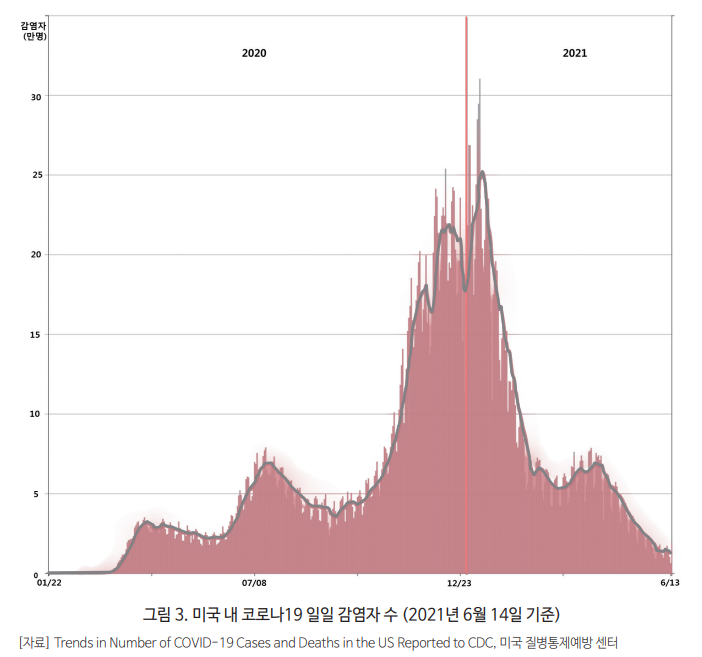

출처: 보건산업브리프 Vol.329 (보건산업진흥원)

코로나로 인해 위축되었던 지점이 코로나 완화 후 증가한거로 추측됨